# Capstone Project - Car Accident Severity

Completed by Qiushan (Lillian) Li. October 2020.

In this notebook we predict the collision severity using machine learning classification algorithms using the Canada-wide dataset.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# 1. Data Exploration
### About dataset

The dataset that this project uses is the National Collision Database (NCDB). The NCDB recorded nearly 290,000 cases of police-reported motor vehicle collisions on public roads in Canada during the year of 2017. It includes following fields:

| Data Elements  | Definition                                    |
|----------------|-----------------------------------------------|
| C_YEAR         | Year                                          |
| C_MNTH         | Month                                         |
| C_WDAY         | Day of week                                   |
| C_HOUR         | Collision hour                                |
| C_SEV          | Collision severity                            |
| C_VEHS         | Number of vehicles involved in collision      |
| C_CONF         | Collision configuration                       |
| C_RCFG         | Roadway configuration                         |
| C_WTHR         | Weather condition                             |
| C_RSUR         | Road surface                                  |
| C_RALN         | Road alignment                                |
| C_TRAF         | Traffic control                               |

| V_ID           | Vehicle sequence number                       |
| V_TYPE         | Vehicle type                                  |
| V_YEAR         | Vehicle model year                            |

| P_ID           | Person sequence number                        |
| P_SEX          | Person sex                                    |
| P_AGE          | Person age |
| P_PSN          | Person position                               |
| P_ISEV         | Medical treatment required                    |
| P_SAFE         | Safety device used                            |
| P_USER         | Road user class                               |


Lets download the dataset and save it as the unbalanced dataframe.

In [3]:
csv_path="https://opendatatc.blob.core.windows.net/opendatatc/NCDB_2017.csv"
df_unbalanced = pd.read_csv (csv_path)
df_unbalanced.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2017,1,1,10,2,1,02,03,1,3,...,01,UUUU,01,M,75,11,2,NN,1,2455950
1,2017,1,1,12,2,1,04,UU,1,5,...,01,UUUU,01,F,21,11,2,02,1,2455959
2,2017,1,1,00,2,1,03,UU,7,3,...,01,UUUU,01,F,34,11,2,02,1,2455998
3,2017,1,1,17,2,2,21,UU,1,1,...,01,UUUU,01,F,50,11,2,02,1,2456104
4,2017,1,1,17,2,2,21,UU,1,1,...,01,UUUU,01,M,63,11,1,NN,1,2456104


## 2.1 Data Imbalance Issue

The NCDB dataset suffers from the data imbalance issue, since it is fortunately relatively rare for collision to result in fatalities, compared to non-fatal injuries. Out of the total 289,841 cases of collisions reported, only 4,468 of them were fatal cases. This might cause bias in machine learning model predictions. Therefore, I balanced the dataset by having 5,000 non-fatal rows randomly selected from the entire dataset. Together with the 4,468 fatal rows, the balanced dataset has 9,946 rows of data.

In [4]:
df_unbalanced.shape

(289841, 23)

In [5]:
df_unbalanced.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [6]:
df_unbalanced['C_SEV'].value_counts()

2    285373
1      4468
Name: C_SEV, dtype: int64

In [7]:
df_fatal = df_unbalanced[df_unbalanced['C_SEV'] ==1]

In [8]:
df_fatal.shape

(4468, 23)

In [9]:
df_injury = df_unbalanced[df_unbalanced['C_SEV'] ==2]

In [10]:
df_injury.shape

(285373, 23)

In [11]:
df_injury=df_injury.sample(n=5000)

In [12]:
df_injury.shape

(5000, 23)

In [13]:
df_injury.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
67742,2017,4,2,18,2,2,33,01,1,1,...,01,2011,02,M,51,13,2,02,2,2544902
89351,2017,5,2,22,2,1,03,QQ,1,1,...,06,2006,01,M,51,11,2,UU,1,2557009
275259,2017,12,4,05,2,01,06,01,1,1,...,01,2006,02,F,53,13,2,02,2,2524508
75086,2017,4,5,03,2,1,06,01,3,2,...,01,2016,01,M,24,11,2,QQ,1,2498893
180822,2017,8,6,23,2,02,36,02,1,1,...,01,2008,04,M,UU,23,1,02,2,2512695


In [14]:
df_unbalanced.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [15]:
df_bal = [df_fatal, df_injury]
df = pd.concat(df_bal)

In [16]:
df.shape

(9468, 23)

In [17]:
df.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

The balanced df contains roughly equal number of C_SEV=2 and C_SEV=1.

In [18]:
df['C_SEV'].value_counts()

2    5000
1    4468
Name: C_SEV, dtype: int64

## 2.2	Data Cleansing and Pre-processing

#### Clean the df by removing invalid data values.

In [60]:
'''' It doesn' work when coded this way.
df = df[df.C_MNTH != ("UU" or "XX")]
df = df[df.C_WDAY != "U"] 
df = df[df.C_HOUR != ("UU" or "XX")]  
df = df[df.C_VEHS != ("UU" or "XX")]  
df = df[df.C_CONF != ("UU" or "XX" or "QQ")]  
df = df[df.C_RCFG != ("UU" or "XX" or "QQ")]  
df = df[df.C_WTHR != ("U" or "X" or "Q")]  
df = df[df.C_RSUR != ("U" or "X" or "Q")]  
df = df[df.C_RALN != ("U" or "X" or "Q")]  
df = df[df.C_TRAF != ("UU" or "XX" or "QQ")]  
df = df[df.V_TYPE != ("UU" or "XX" or "QQ")]  
df = df[df.V_YEAR != ("UUUU" or "XXXX" or "NNNN")]  
df = df[df.P_SEX != ("U" or "X" or "N")] 
df = df[df.P_AGE != ("UU" or "NN" or "XX")]  
df = df[df.P_PSN != ("UU" or "XX" or "QQ" or "NN")]  
df = df[df.P_ISEV != ("U" or "X" or "N")] 
df = df[df.P_SAFE != ("UU" or "XX" or "QQ" or "NN")]  
df = df[df.P_USER != "U"]  

In [19]:
df = df[df.C_MNTH != "UU"]  #Month not NA
df = df[df.C_MNTH != "XX"]

df = df[df.C_WDAY != "U"]  #Day of week is not NA

df = df[df.C_HOUR != "UU"]  #Hour not NA
df = df[df.C_HOUR != "XX"]

df = df[df.C_VEHS != "UU"]  #Number of vehicles involved in collision not NA
df = df[df.C_VEHS != "XX"]

df = df[df.C_CONF != "UU"]  #Collision configuration not NA
df = df[df.C_CONF != "QQ"]
df = df[df.C_CONF != "XX"]

df = df[df.C_RCFG != "UU"]  #Roadway configuration not NA
df = df[df.C_RCFG != "QQ"]
df = df[df.C_RCFG != "XX"]

df = df[df.C_WTHR != "U"]  #Weather condition not NA
df = df[df.C_WTHR != "Q"]
df = df[df.C_WTHR != "X"]

df = df[df.C_RSUR != "U"]  #Road surface not NA
df = df[df.C_RSUR != "Q"]
df = df[df.C_RSUR != "X"]

df = df[df.C_RALN != "U"]  #Road alignment not NA
df = df[df.C_RALN != "Q"]
df = df[df.C_RALN != "X"]

df = df[df.C_TRAF != "UU"]  #Traffic control not NA
df = df[df.C_TRAF != "QQ"]
df = df[df.C_TRAF != "XX"]

df = df[df.V_TYPE != "UU"]  #Vehicle type not NA
df = df[df.V_TYPE != "QQ"]
df = df[df.V_TYPE != "XX"]

df = df[df.V_YEAR != "UUUU"]  #Vehicle model year not NA
df = df[df.V_YEAR != "NNNN"]
df = df[df.V_YEAR != "XXXX"]

df = df[df.P_SEX != "U"]  #Person sex is not NA
df = df[df.P_SEX != "N"]
df = df[df.P_SEX != "X"]

df = df[df.P_AGE != "UU"]  #Person age is not NA
df = df[df.P_AGE != "NN"]
df = df[df.P_AGE != "XX"]

df = df[df.P_PSN != "UU"]  #Person position is not NA
df = df[df.P_PSN != "QQ"]
df = df[df.P_PSN != "XX"]
df = df[df.P_PSN != "NN"]

df = df[df.P_ISEV != "U"]  #Medical treatment required is not NA
df = df[df.P_ISEV != "N"]
df = df[df.P_ISEV != "X"]

df = df[df.P_SAFE != "UU"]  #Safety device used is not NA
df = df[df.P_SAFE != "NN"]
df = df[df.P_SAFE != "XX"]
df = df[df.P_SAFE != "QQ"]

df = df[df.P_USER != "U"]  #Road user class is not NA

In [20]:
#Change data types from object to int
df['C_MNTH']=df['C_MNTH'].astype("int")
df['C_WDAY']=df['C_WDAY'].astype("int")
df['C_HOUR']=df['C_HOUR'].astype("int")
df['C_VEHS']=df['C_VEHS'].astype("int")
df['C_CONF']=df['C_CONF'].astype("int")
df['C_RCFG']=df['C_RCFG'].astype("int")
df['C_WTHR']=df['C_WTHR'].astype("int")
df['C_RSUR']=df['C_RSUR'].astype("int")
df['C_RALN']=df['C_RALN'].astype("int")
df['C_TRAF']=df['C_TRAF'].astype("int")

df['V_TYPE']=df['V_TYPE'].astype("int")
df['V_YEAR']=df['V_YEAR'].astype("int")

df['P_AGE']=df['P_AGE'].astype("int")
df['P_PSN']=df['P_PSN'].astype("int")
df['P_ISEV']=df['P_ISEV'].astype("int")
df['P_SAFE']=df['P_SAFE'].astype("int")
df['P_USER']=df['P_USER'].astype("int")

In [21]:
df.shape

(5110, 23)

In [22]:
df.dtypes

C_YEAR     int64
C_MNTH     int64
C_WDAY     int64
C_HOUR     int64
C_SEV      int64
C_VEHS     int64
C_CONF     int64
C_RCFG     int64
C_WTHR     int64
C_RSUR     int64
C_RALN     int64
C_TRAF     int64
V_ID      object
V_TYPE     int64
V_YEAR     int64
P_ID      object
P_SEX     object
P_AGE      int64
P_PSN      int64
P_ISEV     int64
P_SAFE     int64
P_USER     int64
C_CASE     int64
dtype: object

In [23]:
df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
578,2017,1,1,8,1,2,31,1,1,1,...,1,2009,01,M,63,11,3,2,1,2478585
579,2017,1,1,8,1,2,31,1,1,1,...,8,2017,01,M,29,11,1,2,1,2478585
638,2017,1,1,9,1,1,2,1,2,1,...,1,2003,01,M,24,11,3,1,1,2481696
639,2017,1,1,9,1,1,2,1,2,1,...,1,2003,02,M,42,13,2,1,2,2481696
1006,2017,1,1,12,1,2,36,2,6,3,...,1,2009,01,M,67,11,3,2,1,2490524
1007,2017,1,1,12,1,2,36,2,6,3,...,8,2014,01,M,60,11,1,2,1,2490524
1706,2017,1,1,18,1,1,6,1,1,1,...,1,2012,01,M,60,11,3,2,1,2492864
1730,2017,1,1,12,1,1,6,1,1,1,...,1,2013,01,M,82,11,3,2,1,2493136
1802,2017,1,1,8,1,1,6,3,1,2,...,1,2015,01,M,72,11,3,2,1,2494290
1907,2017,1,1,19,1,2,31,1,1,2,...,1,1995,01,M,56,11,3,2,1,2499387


In [24]:
df['C_SEV'].value_counts()

2    2806
1    2304
Name: C_SEV, dtype: int64

After cleaning the data, we are left with 5110 rows of collision data. With 2806 being Collision producing non-fatal injury and 2304 being Collision producing at least one fatality. These data will be used for visualization and classification.
Note that the number of non-fatal rows could vary, due to the fact that they were randomly selected and may or may not contain invalid values.

## 2.3 Data Visualization
I visualized the data to identify the most important features using seaborn. 

In [25]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1h-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

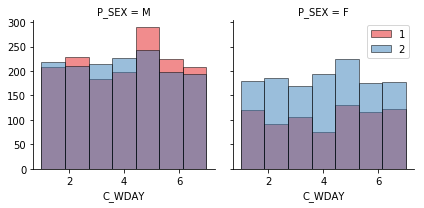

In [26]:
import seaborn as sns
bins = np.linspace(df.C_WDAY.min(), df.C_WDAY.max(),8)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_WDAY', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

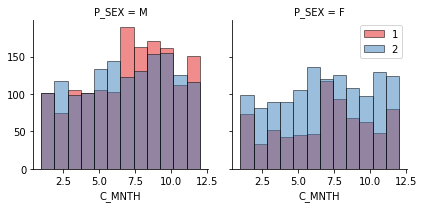

In [27]:
import seaborn as sns
bins = np.linspace(df.C_MNTH.min(), df.C_MNTH.max(),13)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_MNTH', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

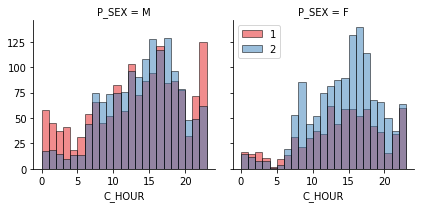

In [28]:
import seaborn as sns
bins = np.linspace(df.C_HOUR.min(), df.C_HOUR.max(),24)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_HOUR', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

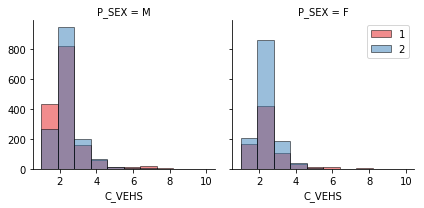

In [29]:
import seaborn as sns
bins = np.linspace(df.C_VEHS.min(), 10,11)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_VEHS', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

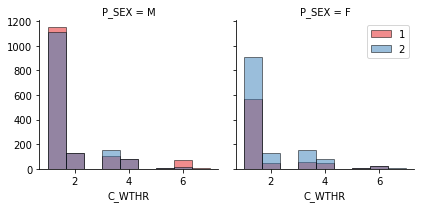

In [30]:
import seaborn as sns
bins = np.linspace(df.C_WTHR.min(), df.C_WTHR.max(), 10)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_WTHR', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

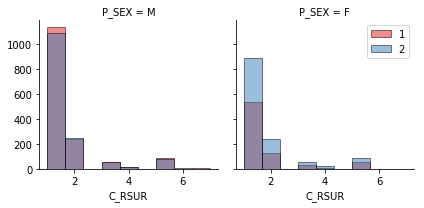

In [31]:
import seaborn as sns
bins = np.linspace(df.C_RSUR.min(), df.C_RSUR.max(), 10)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_RSUR', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

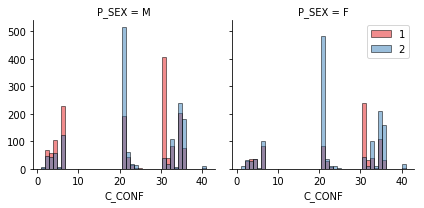

In [32]:
import seaborn as sns
bins = np.linspace(df.C_CONF.min(), df.C_CONF.max(), 42)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_CONF', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

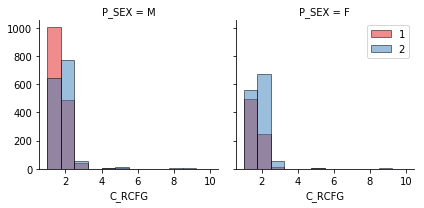

In [33]:
import seaborn as sns
bins = np.linspace(df.C_RCFG.min(), df.C_RCFG.max(), 13)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_RCFG', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

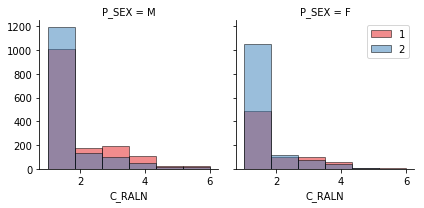

In [34]:
import seaborn as sns
bins = np.linspace(df.C_RALN.min(), df.C_RALN.max(), 7)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_RALN', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

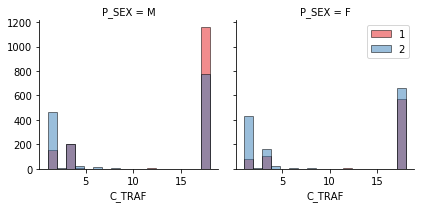

In [35]:
import seaborn as sns
bins = np.linspace(df.C_TRAF.min(), df.C_TRAF.max(), 19)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'C_TRAF', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

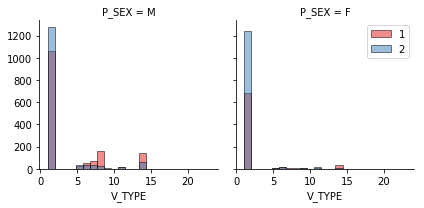

In [36]:
import seaborn as sns
bins = np.linspace(df.V_TYPE.min(), df.V_TYPE.max(), 24)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'V_TYPE', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

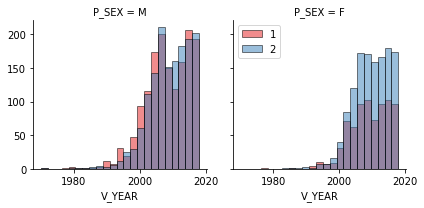

In [37]:
import seaborn as sns
bins = np.linspace(df.V_YEAR.min(), df.V_YEAR.max(), 24)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'V_YEAR', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

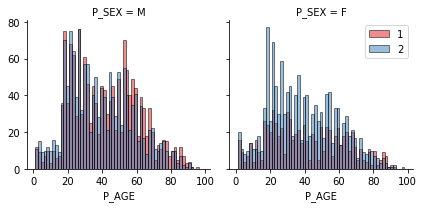

In [38]:
import seaborn as sns
bins = np.linspace(df.P_AGE.min(), df.P_AGE.max(), 60)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'P_AGE', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

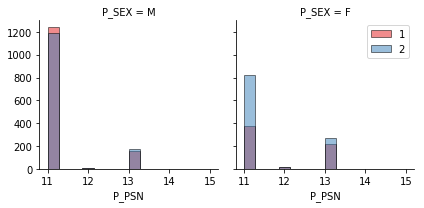

In [39]:
import seaborn as sns
bins = np.linspace(df.P_PSN.min(), 15, 15)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'P_PSN', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

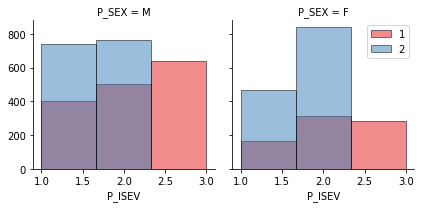

In [40]:
import seaborn as sns
bins = np.linspace(df.P_ISEV.min(), df.P_ISEV.max(), 4)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'P_ISEV', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

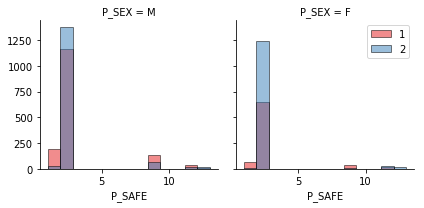

In [41]:
import seaborn as sns
bins = np.linspace(df.P_SAFE.min(), df.P_SAFE.max(), 14)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'P_SAFE', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

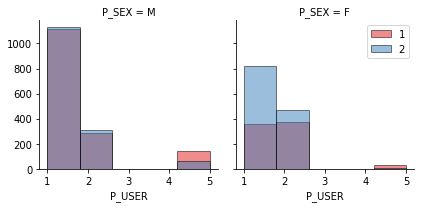

In [42]:
import seaborn as sns
bins = np.linspace(df.P_USER.min(), df.P_USER.max(), 6)
g = sns.FacetGrid(df, col="P_SEX", hue="C_SEV", palette="Set1", col_wrap=2)
g.map(plt.hist, 'P_USER', bins=bins, ec="k", alpha=0.5)
g.axes[-1].legend()
plt.show()

# 3. Feature Engineering and Feature Selection
Improve performance of machine learning models.

##  3.1 Feature Engineering
### Reduce the number of levels for categorical variables

After selecting the important features, in this section, I performed feature engineering and feature selection to make the features either be binary or categorical, and have integer data types. This improved the predictability of the models. 

In [44]:
#Collision hour equals 1 when between 6 to 10, equals 2 when between 10-15, equals 3 when between 16-21, equals 4 during else times. 
df['C_HOUR'] = df['C_HOUR'].apply(lambda x: 1 if (6<=x<=9) else (2 if (10<=x<=15) else (3 if (16<=x<=21) else 4)))

In [45]:
#Number of vehicles involved in collision equals 1 when between 0 to 10, equals 2 when between 11-17, equals 3 when between 18-23. 
df['C_VEHS'] = df['C_VEHS'].apply(lambda x: 1 if (1<=x<=3) else 0)

In [46]:
#Collision configuration equals 1 when code is between 0 to 10 (single vehicle in motion), 
#equals 2 when between 20-30 (Two Vehicles in Motion - Same Direction of Travel), 
#equals 3 when between above 30 (Two Vehicles in Motion - Different Direction of Travel and Two Vehicles - Hit a Parked Motor Vehicle). 
df['C_CONF'] = df['C_CONF'].apply(lambda x: 1 if (1<=x<=10) else (2 if (20<=x<=30) else 3))

In [47]:
#Roadway configuration equals 1 when code is 1 (Non-intersection), 
#equals 2 for all other codes.
df['C_RCFG'] = df['C_RCFG'].apply(lambda x: 1 if (x==1) else 2)

In [48]:
#Weather condition equals 1 when code is 1 (Clear and sunny), 
#equals 2 for all other codes/whethers.
df['C_WTHR'] = df['C_WTHR'].apply(lambda x: 1 if (x==1) else 0)

In [49]:
#Road surface equals 1 when code is 1 (Dry, normal), 
#equals 2 for all other codes/Road surfaces.
df['C_RSUR'] = df['C_RSUR'].apply(lambda x: 1 if (x==1) else 0)

In [50]:
#Road alignment equals 1 when code is 1 (Straight and level), 
#equals 2 for all other codes/Road alignment.
df['C_RALN'] = df['C_RALN'].apply(lambda x: 1 if (x==1) else 0)

In [51]:
#Traffic control equals 1 when code is 18 (No control present), 
#equals 2 for all other codes.
df['C_TRAF'] = df['C_TRAF'].apply(lambda x: 1 if (x==18) else 2)

In [52]:
#Vehicle type equals 1 when code is 1 (Light Duty Vehicle), 
#equals 2 for all other codes/Vehicle types.
df['V_TYPE'] = df['V_TYPE'].apply(lambda x: 1 if (x==1) else 0)

In [53]:
#Vehicle model year equals 1 if manufactured between 2010 to 2020, 
#equals 2 when manufactured between 2000 to 2009, 
#equals 3 for vehicles manufactured prior to 2000.
df['V_YEAR'] = df['V_YEAR'].apply(lambda x: 1 if (2010<=x<=2020) else (2 if (2000<=x<=2009) else 3))

In [54]:
#Person age equals 1 if person younger than 25, 
#equals 2 if between 26 to 60 years old, 
#equals 3 if older than 60.
df['P_AGE'] = df['P_AGE'].apply(lambda x: 1 if (x<=25) else (2 if (26<=x<=60) else 3))

In [55]:
#Person position equals 1 when code is 11 or 13 (Driver or Front row, right outboard, including motorcycle passenger in sidecar), 
#equals 2 for all other codes/Person positions.
df['P_PSN'] = df['P_PSN'].apply(lambda x: 1 if (x==11 or x==13) else 0)

In [56]:
#Safety device used equals 1 when code is 2, 9, 10, 11, or 12 (various Safety device used), 
#equals 2 for No safety device used/required.
df['P_SAFE'] = df['P_SAFE'].apply(lambda x: 1 if (x==2 or x==9 or x==10 or x==11 or x==12) else 0)

In [57]:
#Road user class equals 1 when code is 1 or 2 (Motor Vehicle Driver/Passenger), 
#equals 2 for all other codes/Road users.
df['P_USER'] = df['P_USER'].apply(lambda x: 1 if (x==1 or x==2) else 0)

### Convert Categorical Feature with object dtype to Numerical Values

Lets look at gender:

In [58]:
df.groupby(['P_SEX'])['C_SEV'].value_counts(normalize=True)

P_SEX  C_SEV
F      2        0.630866
       1        0.369134
M      1        0.506408
       2        0.493592
Name: C_SEV, dtype: float64

Females are more likely to have non-fatal collision, compared to male.

Lets convert male to 0 and female to 1:


In [59]:
df['P_SEX'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
578,2017,1,1,4,1,1,3,1,1,1,...,1,2,01,0,3,1,3,1,1,2478585
579,2017,1,1,4,1,1,3,1,1,1,...,0,1,01,0,2,1,1,1,1,2478585
638,2017,1,1,4,1,1,1,1,0,1,...,1,2,01,0,1,1,3,0,1,2481696
639,2017,1,1,4,1,1,1,1,0,1,...,1,2,02,0,2,1,2,0,1,2481696
1006,2017,1,1,4,1,1,3,2,0,0,...,1,2,01,0,3,1,3,1,1,2490524


### One Hot Encoding

In [60]:
# Let df Feature contains all the binary variables.
Feature = df[['C_VEHS','C_RCFG','C_RSUR','C_RALN','C_TRAF','V_TYPE','P_SEX','P_AGE','P_PSN','P_ISEV']]
Feature.head()

,C_VEHS,C_RCFG,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV
578,1,1,1,1,1,1,0,3,1,3
579,1,1,1,1,1,0,0,2,1,1
638,1,1,1,1,1,1,0,1,1,3
639,1,1,1,1,1,1,0,2,1,2
1006,1,2,0,1,2,1,0,3,1,3


Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [61]:
Feature = pd.concat([Feature,pd.get_dummies(df['C_HOUR'],prefix='C_HOUR')], axis=1)

In [62]:
Feature = pd.concat([Feature,pd.get_dummies(df['C_CONF'],prefix='C_CONF')], axis=1)

## 2.2 Feature selection

Lets defind feature sets, X:

In [63]:
X = Feature
X[0:5]

,C_VEHS,C_RCFG,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,C_HOUR_4,C_CONF_1,C_CONF_2,C_CONF_3
578,1,1,1,1,1,1,0,3,1,3,1,0,0,1
579,1,1,1,1,1,0,0,2,1,1,1,0,0,1
638,1,1,1,1,1,1,0,1,1,3,1,1,0,0
639,1,1,1,1,1,1,0,2,1,2,1,1,0,0
1006,1,2,0,1,2,1,0,3,1,3,1,0,0,1


Our labels are:

In [64]:
y = df['C_SEV'].values
y[0:5]

array([1, 1, 1, 1, 1])

### Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

# 3. Classification 

Use the training set to build an accurate model. Then use the test set to report the accuracy of the model
Use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

In [66]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## 3.1 K Nearest Neighbor(KNN)
Find the best k to build the model with the best accuracy.  

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4088, 14) (4088,)
Test set: (1022, 14) (1022,)


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [69]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.70058708, 0.67514677, 0.74168297, 0.74266145, 0.74266145,
       0.75342466, 0.74853229, 0.75636008, 0.75636008])

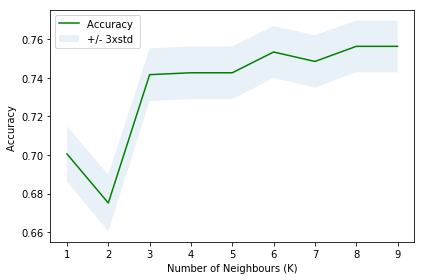

In [98]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [71]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7563600782778865 with k= 8


In [104]:
k = 8
KNN_Model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN_Model_yhat = KNN_Model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_Model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNN_Model_yhat))

Train set Accuracy:  0.7932974559686888
Test set Accuracy:  0.7563600782778865


In [105]:
jaccard_similarity_score(y_test, KNN_Model_yhat)

0.7563600782778865

In [106]:
f1_score(y_test, KNN_Model_yhat, average='weighted') 

0.7558402453407335

## 3.2 Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion="entropy")  #, max_depth = 4
DT_Model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
DT_Model.fit(X_train,y_train)
DT_Model_yhat = DT_Model.predict(X_test)

In [108]:
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_train, DT_Model.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, DT_Model_yhat))

DecisionTrees's Accuracy:  0.7837573385518591


In [79]:
jaccard_similarity_score(y_test, DT_Model_yhat)

0.7837573385518591

In [80]:
f1_score(y_test, DT_Model_yhat, average='weighted') 

0.7833480174168534

## 3.3 Support Vector Machine

In [ ]:
from sklearn import svm
SVM_Model = svm.SVC(kernel='rbf')
SVM_Model.fit(X_train, y_train) 

In [86]:
SVM_Model_yhat = SVM_Model.predict(X_test)
SVM_Model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, SVM_Model_yhat))

SVM's Accuracy:  0.8033268101761253


In [88]:
jaccard_similarity_score(y_test, SVM_Model_yhat)

0.8033268101761253

In [89]:
f1_score(y_test, SVM_Model_yhat, average='weighted') 

0.8018601492293259

## 3.4 Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_Model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
LR_Model_yhat = LR_Model.predict(X_test)
LR_Model_yhat

array([2, 2, 2, ..., 2, 2, 1])

In [92]:
LR_Model_yhat_prob = LR_Model.predict_proba(X_test)
LR_Model_yhat_prob

array([[0.09349416, 0.90650584],
       [0.31876568, 0.68123432],
       [0.49914468, 0.50085532],
       ...,
       [0.41246198, 0.58753802],
       [0.46144609, 0.53855391],
       [0.67410303, 0.32589697]])

In [93]:
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, LR_Model_yhat))

Logistic Regression's Accuracy:  0.7661448140900196


In [94]:
jaccard_similarity_score(y_test, LR_Model_yhat)

0.7661448140900196

In [95]:
f1_score(y_test, LR_Model_yhat, average='weighted') 

0.7651281837227512

In [96]:
log_loss(y_test, LR_Model_yhat_prob)

0.5160189197962292

# 4. Report and Conclusion
Report the evaluation metrics and accuracy of the built models:

| Algorithm          | Accuracy  | Jaccard  | F1-score  | LogLoss |
|--------------------|-----------|----------|-----------|---------|
| KNN                | 0.7564    | 0.7564   | 0.7558    | NA      |
| Decision Tree      | 0.7838    | 0.7838   | 0.7833    | NA      |
| SVM                | 0.8033    | 0.8033   | 0.8028    | NA      |
| LogisticRegression | 0.7661    | 0.7661   | 0.7651    | 0.5160  |

The table above concludes that the SVM algorithm produces the highest accuracy of prediction of 80%.

Thank you for reading this report!